# Api Test Notebook

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '726bf9cacbc345289fc57ae2a7defdf9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
    
# NOTE
# We to go in and put "jupiter notebook --Notebookapp.iopub_data_rate_limit=1e10"s
# into the "anaconda prompt" to change this to allow to pull data

# if that didnt work try using the local host URL as shown in the vedio

{'status': {'timestamp': '2025-10-28T10:13:25.037Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 9385}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12451, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [14]:
type(data)

dict

In [8]:
import pandas as pd

#This will allow us to see all the columns, not just like 15
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
# This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12451,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.994106e+07,1.994106e+07,False,NaN,1,NaN,NaN,None,2025-10-28T10:11:00.000Z,114459.310271,4.920217e+10,-14.8830,0.083433,-0.742950,6.197313,4.550997,4.097028,-3.264674,2.282440e+12,59.0845,2.403646e+12,None,2025-10-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 15:43:32.372816
1,1027,Ethereum,ETH,ethereum,10967,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206981e+08,1.206981e+08,True,NaN,2,NaN,NaN,None,2025-10-28T10:11:00.000Z,4114.943753,3.394291e+10,-14.8786,-0.031541,-1.156044,6.382853,3.031990,-5.470940,8.349547,4.966660e+11,12.8570,4.966660e+11,None,2025-10-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 15:43:32.372816
2,825,Tether USDt,USDT,tether,155187,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.832275e+11,1.859774e+11,True,NaN,3,NaN,NaN,None,2025-10-28T10:11:00.000Z,0.999960,1.213680e+11,-10.5532,-0.003178,-0.006350,-0.031872,-0.040043,-0.006107,-0.000383,1.832201e+11,4.7429,1.859699e+11,None,2025-10-28T10:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-28 15:43:32.372816
3,52,XRP,XRP,xrp,1737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.001728e+10,9.998578e+10,False,NaN,4,NaN,NaN,None,2025-10-28T10:11:00.000Z,2.663546,4.666110e+09,4.4061,0.299141,1.938742,10.354911,-4.005554,-7.574677,-14.280839,1.598588e+11,4.1382,2.663546e+11,None,2025-10-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 15:43:32.372816
4,1839,BNB,BNB,bnb,2882,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.377383e+08,1.377383e+08,False,NaN,5,NaN,NaN,None,2025-10-28T10:11:00.000Z,1135.931836,3.742431e+09,-0.4717,0.105105,-1.621154,6.160476,17.447192,32.455424,42.090362,1.564613e+11,4.0502,1.564613e+11,None,2025-10-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 15:43:32.372816
5,5426,Solana,SOL,solana,1033,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.497014e+08,6.128476e+08,True,NaN,6,5.252369e+08,1.057381e+11,None,2025-10-28T10:11:00.000Z,201.315098,6.029513e+09,-9.6826,-0.965136,0.572528,8.962852,0.402049,-3.488082,12.060708,1.106632e+11,2.8647,1.233755e+11,None,2025-10-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 15:43:32.372816
6,3408,USDC,USDC,usd-coin,33507,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.621053e+10,7.621053e+10,False,NaN,7,6.090122e+10,6.088825e+10,None,2025-10-28T10:11:00.000Z,0.999787,1.593602e+10,9.0088,-0.011574,-0.007842,-0.009121,0.002488,-0.005526,-0.008698,7.619430e+10,1.9724,7.619430e+10,None,2025-10-28T10:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-28 15:43:32.372816
7,74,Dogecoin,DOGE,dogecoin,1335,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.515353e+11,1.515353e+11,True,NaN,8,NaN,NaN,None,2025-10-28T10:11:00.000Z,0.200197,1.587716e+09,-28.8839,-0.220676,-1.302375,3.193219,-11.416876,-6.921516,-9.349910,3.033687e+10,0.7853,3.033687e+10,None,2025-10-28T10:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 15:43:32.372816
8,1958,TRON,TRX,tron,1254,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosyst

In [10]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '726bf9cacbc345289fc57ae2a7defdf9',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

# NOTE:
# we need to go in and put "jupiter notebook --Notebookapp.iopub_data_rate_limit=1e10"
# into the 'anaconda prompt' to change this to allow to pull data

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'D:\Data_analytics\Python\Web scraping\API_1.csv'):
        df.to_csv(r'D:\Data_analytics\Python\Web scraping\API_1.csv', header = 'column_names')
    else:
        df.to_csv(r'D:\Data_analytics\Python\Web scraping\API_1.csv', mode = 'a', header = False)

# if that didnt work try using the local host URL as shown in the vedio
    

In [11]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner Completed")
    sleep(60) #sleep for 1 minute
exit()

API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [12]:
df72 = pd.read_csv(r'D:\Data_analytics\Python\Web scraping\API_1.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12451,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.994106e+07,1.994106e+07,False,NaN,1,NaN,NaN,NaN,2025-10-28T10:33:00.000Z,114495.379673,4.796774e+10,-19.4222,0.195816,-0.819238,6.165226,4.590276,4.159690,-3.246998,2.283159e+12,59.0896,2.404403e+12,NaN,2025-10-28T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 16:05:31.994232
1,1,1027,Ethereum,ETH,ethereum,10968,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206981e+08,1.206981e+08,True,NaN,2,NaN,NaN,NaN,2025-10-28T10:33:00.000Z,4115.105735,3.306897e+10,-17.6522,0.167566,-1.345917,6.307503,2.975129,-5.536241,8.297163,4.966856e+11,12.8545,4.966856e+11,NaN,2025-10-28T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 16:05:31.994232
2,2,825,Tether USDt,USDT,tether,155191,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.832275e+11,1.859774e+11,True,NaN,3,NaN,NaN,NaN,2025-10-28T10:33:00.000Z,1.000029,1.207489e+11,-11.2341,0.014392,0.012687,-0.033810,-0.026869,-0.000895,0.002442,1.832328e+11,4.7422,1.859827e+11,NaN,2025-10-28T10:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-28 16:05:31.994232
3,3,52,XRP,XRP,xrp,1738,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.001728e+10,9.998578e+10,False,NaN,4,NaN,NaN,NaN,2025-10-28T10:33:00.000Z,2.660131,4.659904e+09,4.0811,0.416982,1.694643,10.182894,-4.441114,-7.701531,-14.535364,1.596538e+11,4.1319,2.660131e+11,NaN,2025-10-28T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 16:05:31.994232
4,4,1839,BNB,BNB,bnb,2882,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.377383e+08,1.377383e+08,False,NaN,5,NaN,NaN,NaN,2025-10-28T10:33:00.000Z,1136.022846,3.731107e+09,-1.1110,0.280980,-1.478408,6.180816,17.333139,32.393210,42.137958,1.564738e+11,4.0496,1.564738e+11,NaN,2025-10-28T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 16:05:31.994232
5,5,5426,Solana,SOL,solana,1033,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.497014e+08,6.128476e+08,True,NaN,6,5.252369e+08,1.055681e+11,NaN,2025-10-28T10:33:00.000Z,200.991354,6.019385e+09,-10.0257,-0.371151,0.381228,8.354473,0.078492,-3.619049,11.784157,1.104852e+11,2.8594,1.231771e+11,NaN,2025-10-28T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 16:05:31.994232
6,6,3408,USDC,USDC,usd-coin,33523,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.621053e+10,7.621053e+10,False,NaN,7,6.090122e+10,6.089235e+10,NaN,2025-10-28T10:34:00.000Z,0.999854,1.592485e+10,5.5957,0.002284,0.002047,-0.050039,0.000198,-0.007492,-0.019033,7.619943e+10,1.9721,7.619943e+10,NaN,2025-10-28T10:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-28 16:05:31.994232
7,7,74,Dogecoin,DOGE,dogecoin,1336,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.515353e+11,1.515353e+11,True,NaN,8,NaN,NaN,NaN,2025-10-28T10:33:00.000Z,0.200339,1.579547e+09,-29.1496,0.229932,-1.337473,3.415906,-11.522306,-6.885760,-9.625183,3.035850e+10,0.7857,3.035850e+10,NaN,2025-10-28T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 16:05:31.994232
8,8,1958,TRON,TRX,tron,1254,2017-09-13T00:00:00.000Z,"['media', 'payments', '

In [ ]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [18]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12451,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19941062.00000,19941062.00000,False,NaN,1,NaN,NaN,NaN,2025-10-28T10:33:00.000Z,114495.37967,47967735420.86394,-19.42220,0.19582,-0.81924,6.16523,4.59028,4.15969,-3.24700,2283159464780.66211,59.08960,2404402973141.25000,NaN,2025-10-28T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 16:05:31.994232
1,1,1027,Ethereum,ETH,ethereum,10968,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120698129.77309,120698129.77309,True,NaN,2,NaN,NaN,NaN,2025-10-28T10:33:00.000Z,4115.10574,33068971941.38621,-17.65220,0.16757,-1.34592,6.30750,2.97513,-5.53624,8.29716,496685566082.98071,12.85450,496685566082.97998,NaN,2025-10-28T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 16:05:31.994232
2,2,825,Tether USDt,USDT,tether,155191,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,183227527925.87521,185977352465.58524,True,NaN,3,NaN,NaN,NaN,2025-10-28T10:33:00.000Z,1.00003,120748938630.90971,-11.23410,0.01439,0.01269,-0.03381,-0.02687,-0.00090,0.00244,183232755447.46533,4.74220,185982658440.26999,NaN,2025-10-28T10:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-28 16:05:31.994232
3,3,52,XRP,XRP,xrp,1738,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,60017279517.00000,99985778283.00000,False,NaN,4,NaN,NaN,NaN,2025-10-28T10:33:00.000Z,2.66013,4659903710.41344,4.08110,0.41698,1.69464,10.18289,-4.44111,-7.70153,-14.53536,159653844527.48056,4.13190,266013131238.73999,NaN,2025-10-28T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 16:05:31.994232
4,4,1839,BNB,BNB,bnb,2882,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,137738270.38000,137738270.38000,False,NaN,5,NaN,NaN,NaN,2025-10-28T10:33:00.000Z,1136.02285,3731106934.60842,-1.11100,0.28098,-1.47841,6.18082,17.33314,32.39321,42.13796,156473821878.98508,4.04960,156473821878.98999,NaN,2025-10-28T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 16:05:31.994232
5,5,5426,Solana,SOL,solana,1033,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,549701448.72518,612847564.57046,True,NaN,6,525236893.30000,105568074482.79697,NaN,2025-10-28T10:33:00.000Z,200.99135,6019384550.67931,-10.02570,-0.37115,0.38123,8.35447,0.07849,-3.61905,11.78416,110485238608.65950,2.85940,123177061947.59000,NaN,2025-10-28T10:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-28 16:05:31.994232
6,6,3408,USDC,USDC,usd-coin,33523,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,76210530180.44554,76210530180.44554,False,NaN,7,60901219650.23000,60892353264.58836,NaN,2025-10-28T10:34:00.000Z,0.99985,15924847363.46274,5.59570,0.00228,0.00205,-0.05004,0.00020,-0.00749,-0.01903,76199434968.32312,1.97210,76199434968.32001,NaN,2025-10-28T10:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-28 16:05:31.994232
7,7,74,Dogecoin,DOGE,dogecoin,1336,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,151535346383.70523,151535346383.70523,True,NaN,8,NaN,NaN,NaN,2025-10-28T10:33:00.000Z,0.20034,1579546759.93485,-29.14960,0.22993,-1.33747,3.41591,-11.52231,-6.88576,-9.62518,30358

In [ ]:
# Now let's look at the coin trends over time

df3 = df72.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h',
                                          'quote.USD.percent_change_7d','quote.USD.percent_change_30d',
                                          'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.17302,-0.82789,6.06130,4.57829,4.13343,-3.26138
Ethereum,0.13922,-1.37977,6.21721,2.95358,-5.55965,8.27609
Tether USDt,0.01026,0.00845,-0.05525,-0.03250,-0.00773,-0.00188
XRP,0.30823,1.63632,10.06297,-4.49161,-7.73426,-14.59436
BNB,0.24577,-1.50311,6.08483,17.29637,32.36246,42.11917
Solana,-0.46485,0.32776,8.26077,0.00913,-3.66477,11.70460
USDC,0.00406,0.00538,-0.05579,0.00218,-0.00295,-0.01449
Dogecoin,0.17583,-1.35381,3.28512,-11.55204,-6.88146,-9.67613
TRON,0.14393,-0.71400,-7.16051,-11.41865,-11.89392,-11.40097


In [21]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.17302
              quote.USD.percent_change_24h    -0.82789
              quote.USD.percent_change_7d      6.06130
              quote.USD.percent_change_30d     4.57829
              quote.USD.percent_change_60d     4.13343
              quote.USD.percent_change_90d    -3.26138
Ethereum      quote.USD.percent_change_1h      0.13922
              quote.USD.percent_change_24h    -1.37977
              quote.USD.percent_change_7d      6.21721
              quote.USD.percent_change_30d     2.95358
              quote.USD.percent_change_60d    -5.55965
              quote.USD.percent_change_90d     8.27609
Tether USDt   quote.USD.percent_change_1h      0.01026
              quote.USD.percent_change_24h     0.00845
              quote.USD.percent_change_7d     -0.05525
              quote.USD.percent_change_30d    -0.03250
              quote.USD.percent_change_60d    -0.00773
              quote.US

In [23]:
type(df3),type(df4)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [26]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.17302
             quote.USD.percent_change_24h  -0.82789
             quote.USD.percent_change_7d    6.06130
             quote.USD.percent_change_30d   4.57829
             quote.USD.percent_change_60d   4.13343
             quote.USD.percent_change_90d  -3.26138
Ethereum     quote.USD.percent_change_1h    0.13922
             quote.USD.percent_change_24h  -1.37977
             quote.USD.percent_change_7d    6.21721
             quote.USD.percent_change_30d   2.95358
             quote.USD.percent_change_60d  -5.55965
             quote.USD.percent_change_90d   8.27609
Tether USDt  quote.USD.percent_change_1h    0.01026
             quote.USD.percent_change_24h   0.00845
             quote.USD.percent_change_7d   -0.05525
             quote.USD.percent_change_30d  -0.03250
             quote.USD.percent_change_60d  -0.00773
             quote.USD.percent_change_90d  -0.00188
XRP          quote.USD.percent_change_1h    0.30823
             quote.USD.percent_change_24h   1.63632
             quote.USD.percent_change_7d   10.06297
             quote.USD.percent_change_30d  -4.49161
             quote.USD.percent_change_60d  -7.73426
             quote.USD.percent_change_90d -14.59436
BNB          quote.USD.percent_change_1h    0.24577
             quote.USD.percent_change_24h  -1.50311
             quote.USD.percent_change_7d    6.08483
             quote.USD.percent_change_30d  17.29637
             quote.USD.percent_change_60d  32.36246
             quote.USD.percent_change_90d  42.11917
Solana       quote.USD.percent_change_1h   -0.46485
             quote.USD.percent_change_24h   0.32776
             quote.USD.percent_change_7d    8.26077
             quote.USD.percent_change_30d   0.00913
             quote.USD.percent_change_60d  -3.66477
             quote.USD.percent_change_90d  11.70460
USDC         quote.USD.percent_change_1h    0.00406
             quote.USD.percent_change_24h   0.00538
             quote.USD.percent_change_7d   -0.05579
             quote.USD.percent_change_30d   0.00218
             quote.USD.percent_change_60d  -0.00295
             quote.USD.percent_change_90d  -0.01449
Dogecoin     quote.USD.percent_change_1h    0.17583
             quote.USD.percent_change_24h  -1.35381
             quote.USD.percent_change_7d    3.28512
             quote.USD.percent_change_30d -11.55204
             quote.USD.percent_change_60d  -6.88146
             quote.USD.percent_change_90d  -9.67613
TRON         quote.USD.percent_change_1h    0.14393
             quote.USD.percent_change_24h  -0.71400
             quote.USD.percent_change_7d   -7.16051
             quote.USD.percent_change_30d -11.41865
             quote.USD.percent_change_60d -11.89392
             quote.USD.percent_change_90d -11.40097
Cardano      quote.USD.percent_change_1h    0.27833
             quote.USD.percent_change_24h  -1.74047
             quote.USD.percent_change_7d    3.44973
             quote.USD.percent_change_30d -13.40256
             quote.USD.percent_change_60d -19.44320
             quote.USD.percent_change_90d -14.04707
Hyperliquid  quote.USD.percent_change_1h    0.76910
             quote.USD.percent_change_24h  -0.41514
             quote.USD.percent_change_7d   31.87344
             quote.USD.percent_change_30d   7.53769
             quote.USD.percent_change_60d   5.80232
             quote.USD.percent_change_90d   9.45389
Chainlink    quote.USD.percent_change_1h    0.87206
             quote.USD.percent_change_24h  -0.25699
             quote.USD.percent_change_7d    3.20675
             quote.USD.percent_change_30d -10.19061
             quote.USD.percent_change_60d -21.18547
             quote.USD.percent_change_90d   5.15039
Bitcoin Cash quote.USD.percent_change_1h    0.13924
             quote.USD.percent_change_24h  -0.65334
             quote.USD.percent_change_7d   18.70649
             quote.USD.percent_change_30d

In [27]:
type(df5)

pandas.core.frame.DataFrame

In [28]:
df5.count()

values    90
dtype: int64

In [ ]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe

index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function

df6 = df5.set_index(index)
df6

,values
0,0.17302
1,-0.82789
2,6.06130
3,4.57829
4,4.13343
5,-3.26138
6,0.13922
7,-1.37977
8,6.21721
9,2.95358


In [ ]:
# If it only has the index and values try doing reset_index like "df5.reset_index()"

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.17302
1,Bitcoin,quote.USD.percent_change_24h,-0.82789
2,Bitcoin,quote.USD.percent_change_7d,6.06130
3,Bitcoin,quote.USD.percent_change_30d,4.57829
4,Bitcoin,quote.USD.percent_change_60d,4.13343
5,Bitcoin,quote.USD.percent_change_90d,-3.26138
6,Ethereum,quote.USD.percent_change_1h,0.13922
7,Ethereum,quote.USD.percent_change_24h,-1.37977
8,Ethereum,quote.USD.percent_change_7d,6.21721
9,Ethereum,quote.USD.percent_change_30d,2.95358


In [ ]:
# Change the column name

df7 = df6.rename(columns = {'level_1' : 'Percent_change'})
df7

,name,Percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.17302
1,Bitcoin,quote.USD.percent_change_24h,-0.82789
2,Bitcoin,quote.USD.percent_change_7d,6.06130
3,Bitcoin,quote.USD.percent_change_30d,4.57829
4,Bitcoin,quote.USD.percent_change_60d,4.13343
5,Bitcoin,quote.USD.percent_change_90d,-3.26138
6,Ethereum,quote.USD.percent_change_1h,0.13922
7,Ethereum,quote.USD.percent_change_24h,-1.37977
8,Ethereum,quote.USD.percent_change_7d,6.21721
9,Ethereum,quote.USD.percent_change_30d,2.95358


In [ ]:
df7['Percent_change'] = df7['Percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d',
                                                      'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],
                                                      ['1h','24h','7d','30d','60d','90d'])
df7

,name,Percent_change,values
0,Bitcoin,1h,0.17302
1,Bitcoin,24h,-0.82789
2,Bitcoin,7d,6.06130
3,Bitcoin,30d,4.57829
4,Bitcoin,60d,4.13343
5,Bitcoin,90d,-3.26138
6,Ethereum,1h,0.13922
7,Ethereum,24h,-1.37977
8,Ethereum,7d,6.21721
9,Ethereum,30d,2.95358


In [ ]:
df7['Percent_change'] = df7['Percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d',
                                                      'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],
                                                      ['1h','24h','7d','30d','60d','90d'])
df7

In [35]:
# Pandas Visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

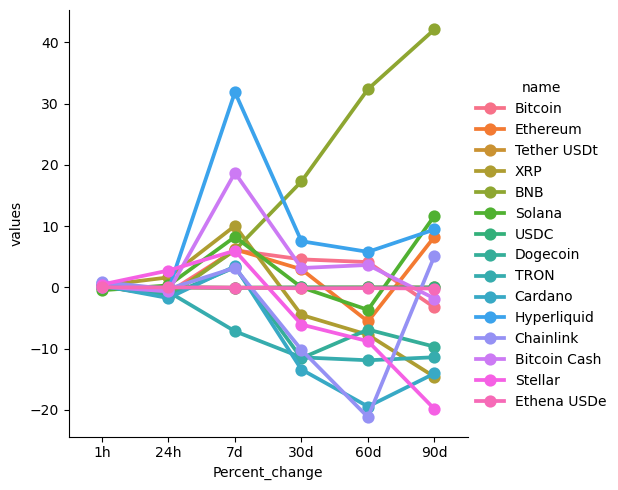

In [39]:
sns.catplot(x='Percent_change', y='values', hue='name', kind='point', data=df7)

In [ ]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df8 = df72[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,114495.37967,2025-10-28 16:05:31.994232
15,Bitcoin,114483.85073,2025-10-28 16:06:33.184947
30,Bitcoin,114480.05657,2025-10-28 16:07:34.083113


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

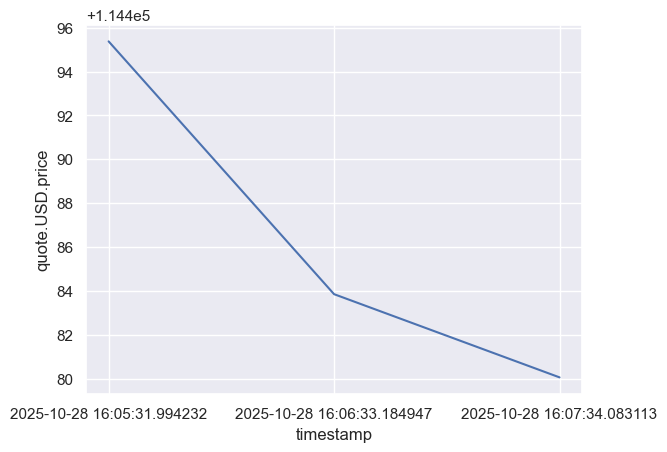

In [53]:
sns.set_theme(style = "darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)
